# Introduction


In this homework, you'll be required to load in a dataset which has about 500 features. By using
Lasso ($L^1$) regression, we'll find the optimal constraint on the $L^1$ norm which gives us the best
$R^2$. Then we'll plot the results.

Recall we minimize the following on ** training data: $(x_i,y_i)$**

$$\min_{\beta} \frac{1}{N} \sum_{i=1}^N (y_i - \beta \cdot x_i)^2 + \lambda \|\beta \|_{L^1}.$$


Denoting $\beta_{\lambda}$ as the minimum of the above, we then choose $\lambda$ to maximize $R^2$ on **testing data: $(x_j,y_j)$**

$$ \max_{\lambda} 1 - \frac{\sum_{j} (y_j - \beta_{\lambda} \cdot x_j)^2}{\sum_j (y_j - \bar y)^2}$$


# Lasso Regularization

## Problem 1

a) Load in hw2data.csv from ../data into a pandas dataframe.

In [18]:
# read data into a DataFrame
%matplotlib inline
import pandas as pd
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import json

import numpy as np
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, ShuffleSplit

%matplotlib inline

# a)
# Read data and set variables
df = pd.read_csv('/Users/seasonyang/Desktop/Intro to data/python-introduction-xxSeasonxx/hw2data.csv', index_col=0)
df.head()

,1,2,3,4,5,6,7,8,9,10,...,491,492,493,494,495,496,497,498,499,y
0,,,,,,,,,,,,,,,,,,,,,
0.382732,-0.034242,1.096347,-0.234216,-0.347451,-0.581268,-1.632635,-1.567768,-1.179158,1.301428,0.895260,...,0.178793,-0.799422,0.240788,0.289121,0.412871,-0.198399,0.094192,-1.147611,-0.358114,-2.663126
0.555963,0.892474,-0.422315,0.104714,0.228053,0.201480,0.540774,-1.818078,-0.049324,0.239034,-1.000330,...,-0.740137,-0.565498,0.476031,-2.158069,1.318551,-0.239297,-0.246794,-1.079343,-0.114226,10.399650
0.013240,-0.121945,0.339059,-0.589632,-0.895816,0.548328,0.098667,0.197181,1.059027,-1.022564,-0.855240,...,-0.739936,1.315138,-0.323457,0.197828,0.097751,1.401523,0.158434,-1.141901,-1.310970,-21.762801
-1.532921,-1.711970,0.046135,-0.958374,-0.080812,-0.703859,-0.770784,-0.480845,0.703586,0.929145,0.371173,...,0.473488,1.855246,1.415656,-0.302746,0.989679,0.585851,1.136388,0.671617,-0.974167,2.139453
-1.619685,0.572627,1.902618,-0.775664,-0.188090,-1.035748,1.177830,-2.305167,-2.263660,0.375020,-0.082344,...,-1.303220,0.466751,0.161106,0.320032,2.079177,-0.907466,-0.192404,-1.212516,-0.080599,0.194017


b) Set y to be the y variable in the dataframe from a and X to be the remaining features.

In [3]:
# Cross validation
X = df.drop('y', axis=1)
y = df.y

#Normalize the data
scaler = StandardScaler()
X = X.as_matrix().astype(np.float)
X = scaler.fit_transform(X)
X = pd.DataFrame(X, index=df.index, columns=df.columns[:499])

c) As shown in the Booking.com example, using Lasso regression, find the regularization strength
which optimizes the $R^2$. 

**Hint:** Take a range of alpha from `np.logspace(-8,-3,1000)`

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

alphas = np.logspace(-5,0,1000)
train_errors=[]
test_errors=[]
alpha_optim = 0

for alpha in alphas:
    regr = Lasso(alpha = alpha)
    regr.fit(X_train, y_train)
    test_errors.append(regr.score(X_test,y_test))
    train_errors.append(regr.score(X_train,y_train))
    
best_alpha_index= np.argmax(test_errors)
alpha_optim = alphas[best_alpha_index]

print "With in the range logspace(-5,0)"
print "The regularization strength which optimizes the R^2 is alpha = %s with R^2 = %s" %(alpha_optim, max(test_errors))

With in the range logspace(-5,0)
The regularization strength which optimizes the R^2 is alpha = 0.103279473192


d) Plot the training perforamnce versus the testing performance, and observe whree the test performance is
maximized. I've written an outline of the code you need.

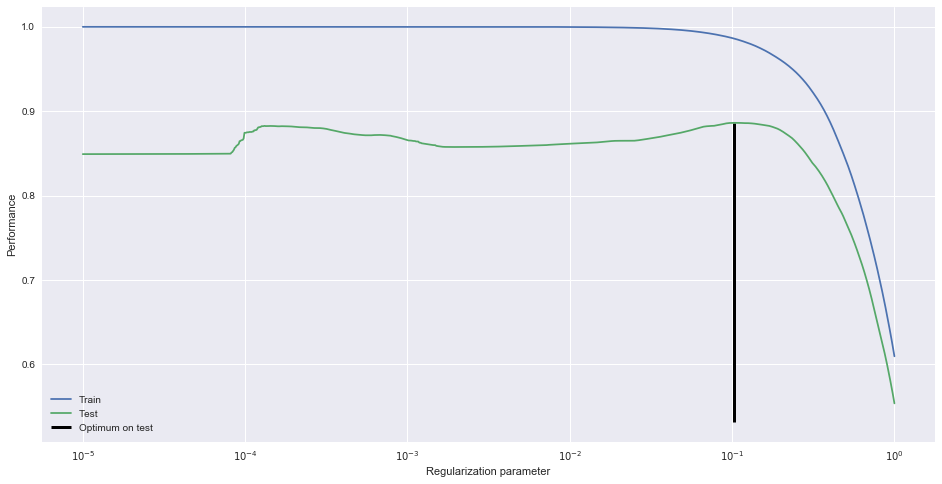

As shown in the plot
The test performance is maximized at alpha = 0.103279473192 with R^2 = 0.886172807963


In [25]:
plt.figure(figsize=(16,8))
plt.subplot(1, 1, 1)

plt.semilogx(alphas, train_errors, label='Train')
plt.semilogx(alphas, test_errors, label='Test')
plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
           linewidth=3, label='Optimum on test')
plt.legend(loc='lower left')
#plt.ylim([0, 1.2])
plt.xlabel('Regularization parameter')
plt.ylabel('Performance')
plt.show()
print "As shown in the plot"
print "The test performance is maximized at alpha = %s with R^2 = %s" %(alpha_optim, max(test_errors))

e) Plot the top coefficients based on this optimal paramter. Why do you think so many are zero? 

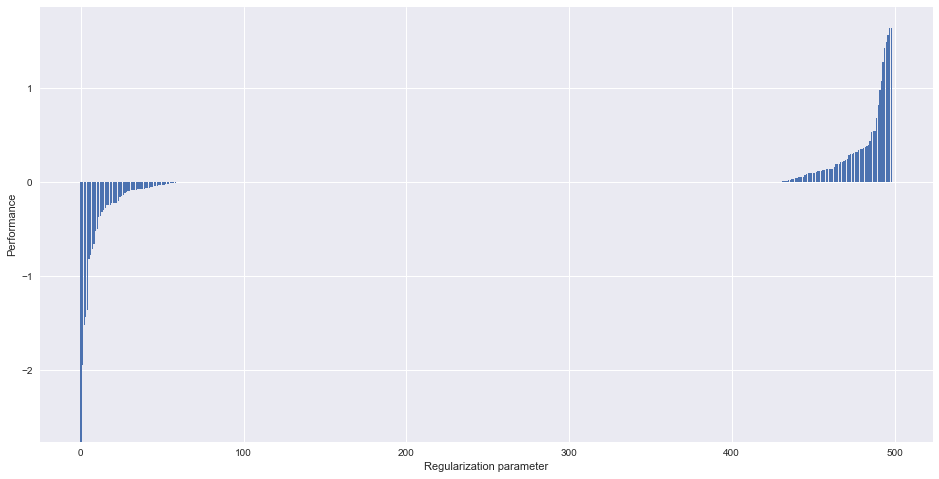

Here we see within 500 independent variables, large number of them has coefficient 0


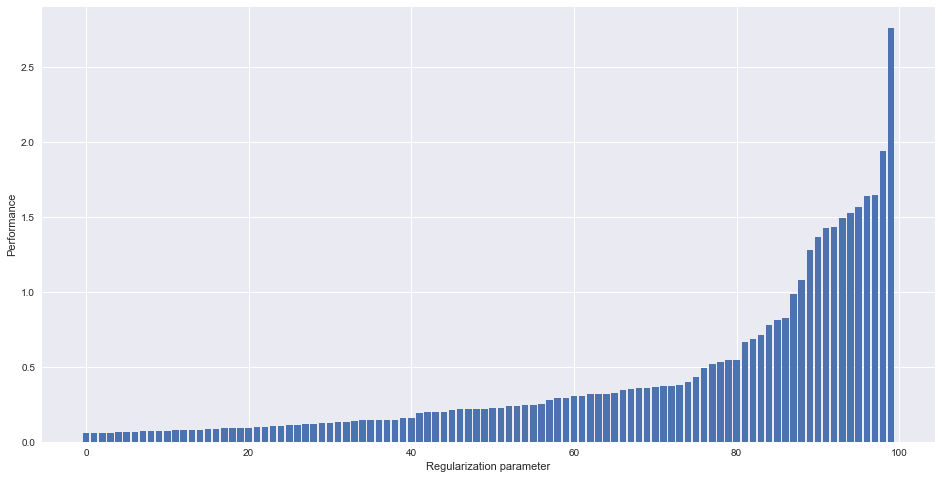

In [26]:
regr = Lasso(alpha=alphas[best_alpha_index])
regr.fit(X_train,y_train)
regr.coef_

# df_coeffs = pd.DataFrame({'coeffs':regr.coef_, 'name':X.columns.values})
# df_coeffs= df_coeffs.sort(['coeffs'])
# df_coeffs[::-1].plot(x='name',y='coeffs',kind='bar', figsize = (16,8))

plt.figure(figsize=(16,8))
plt.subplot(1, 1,1)

plt.bar(range(499),np.sort( regr.coef_))
plt.legend(loc='lower left')
plt.xlabel('Regularization parameter')
plt.ylabel('Performance')
plt.show()

print "Here we see within 500 independent variables, large number of them has coefficient 0"

plt.figure(figsize=(16,8))
plt.subplot(1, 1,1)

coef_sort_pos = np.sort(np.abs(regr.coef_))
plt.bar(range(100),coef_sort_pos[-100:])
plt.legend(loc='lower left')
plt.xlabel('Regularization parameter')
plt.ylabel('Performance')

plt.show()
print "At the above plot, I plot the top 100 coefficients"


![title](./img/regularization.png)

**Comment**

Using the image from the lecture slide, becasue we use Lasso such that the coefficient

$$|\beta_1| + |\beta_2| \leq t$$

Thus, we only have 4 corners to find the minimum and thus we shall expect lots of zeros in the coefficient

f) Compute the $R^2$ with the optimal coefficient found above on 5 folds using cross_val_score and plot the
results. Does the model work well on all random subsets?

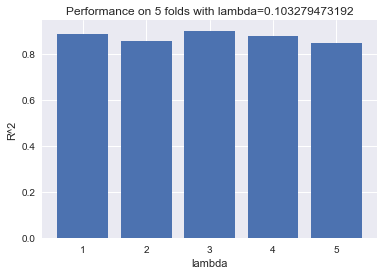

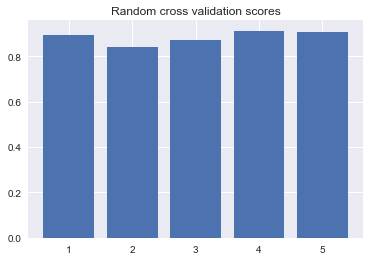

In [23]:
from sklearn.model_selection import cross_val_score
regr = Lasso(alpha=alphas[best_alpha_index])
scores = cross_val_score(regr, X, y, cv=5)
plt.xlabel('lambda')
plt.ylabel('R^2')
plt.title('Performance on 5 folds with lambda=' + str(alphas[best_alpha_index]))
plt.bar(range(1,6),scores)
plt.show()

from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5, test_size=0.2)
scorecv = cross_val_score(regr, X, y, cv=cv)
plt.bar(range(1, 6), scorecv)
plt.title('Random cross validation scores')
plt.show()

**Comment**

After we test on random subset, we still see a high $R^2$ on 5 different validations.  Therefore, this alpha works well on random subset

f) Repeat e) but using cross validation. Use error bars on the features which are the standard deviation of the 
coefficiens obtained above. For this problem I"ll walk you through the code. You just need to apply your optimal
$\alpha$ found above. 

In [12]:
from sklearn.cross_validation import KFold
from sklearn import preprocessing
def run_cv_coeffs(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    kf = KFold(len(y),n_folds=5,shuffle=True)
    y_pred = y.copy()
    coeffs=[]
    # Iterate through folds
    for train_index, test_index in kf:
        
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        # Initialize a classifier with key word arguments
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[test_index] = clf.predict(X_test)
        coeffs.append(clf.coef_)
    return coeffs

scaler = preprocessing.StandardScaler()
X_scaled = X.as_matrix().astype(np.float)
X_scaled = scaler.fit_transform(X)

coeffs=run_cv_coeffs(X_scaled,np.array(y),Lasso,alpha=alphas[best_alpha_index])

/Users/seasonyang/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [13]:
def get_coeffs(coeffs):
    coeffs_avgd = [(coeffs[0][i] + coeffs[1][i] + coeffs[2][i] + coeffs[3][i] + coeffs[4][i])/5 for i in range(0,len(X.columns))]
    coeffs_std = [np.std([coeffs[0][i],coeffs[1][i],coeffs[2][i],coeffs[3][i],coeffs[4][i]]) for i in range(0,len(X.columns))]
    return coeffs_avgd, coeffs_std
coeffs_avg,coeffs_std=get_coeffs(coeffs)

/Users/seasonyang/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


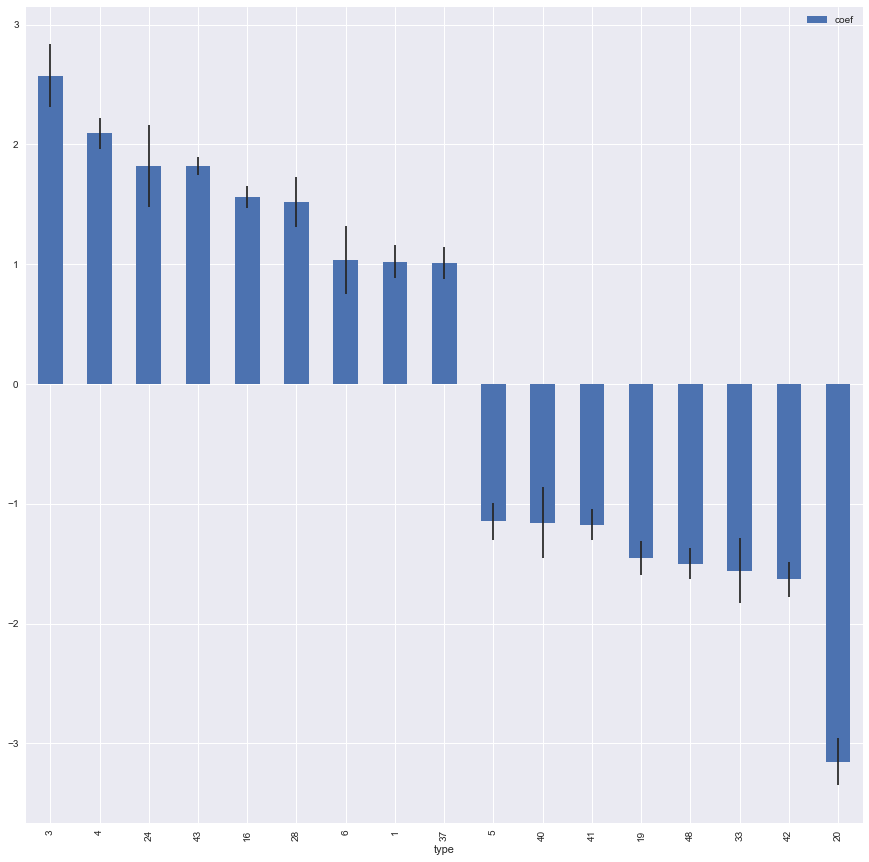

In [14]:
dfCoeffs = pd.DataFrame({'type':X.columns.values, 'coef':coeffs_avg, 'std':coeffs_std})
dfCoeffs = dfCoeffs[(dfCoeffs['coef']>1) |(dfCoeffs['coef']<-1) ]
plt.figure(figsize=(15,15))
dfCoeffs_sorted = dfCoeffs.sort(['coef'])[::-1]
yerr_vals = dfCoeffs_sorted['std'].values
dfCoeffs_sorted.plot(x='type',y='coef',kind='bar',yerr=yerr_vals,figsize=(15,15))